In [ ]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
from matplotlib import pyplot
from dotenv import load_dotenv
from random import randbytes
import numpy as np
import os

Section - Qubit Register and Classical Register Initialization

In [ ]:
load_dotenv()

provider = QiskitRuntimeService(token=os.environ["ibm_token"], channel="ibm_cloud", instance=os.environ["ibm_crn"])

# Selecting a backend
real_backend = provider.least_busy(operational=True, simulator=False)
backend = AerSimulator.from_backend(real_backend)
sampler = Sampler(backend)

qr = QuantumRegister(9, name='qr')
cr = ClassicalRegister(1, name='cr')

shor = QuantumCircuit(qr,cr)

Section - Superposition State Preparation (|1> on first qubit, others in superposition)

In [3]:
# shor.x(qr[0]) # Uncomment to set the first qubit to |1> (optional)

shor.cx(qr[0],qr[3])
shor.cx(qr[0],qr[6])

shor.h(qr[0])
shor.h(qr[3])
shor.h(qr[6])

shor.cx(qr[0],qr[1])
shor.cx(qr[3],qr[4])
shor.cx(qr[6],qr[7])

shor.cx(qr[0],qr[2])
shor.cx(qr[3],qr[5])
shor.cx(qr[6],qr[8])

shor.barrier(qr)

# Error Part of Circuit Start

shor.x(qr[0]) # Bit flip
shor.z(qr[0]) # Bit phase flip

# Error Part of Circuit End

shor.barrier(qr)
shor.cx(qr[0],qr[1])
shor.cx(qr[3],qr[4])
shor.cx(qr[6],qr[7])

shor.cx(qr[0],qr[2])
shor.cx(qr[3],qr[5])
shor.cx(qr[6],qr[8])

shor.ccx(qr[1],qr[2],qr[0])
shor.ccx(qr[4],qr[5],qr[3])
shor.ccx(qr[8],qr[7],qr[6])

shor.h(qr[0])
shor.h(qr[3])
shor.h(qr[6])

shor.cx(qr[0],qr[3])
shor.cx(qr[0],qr[6])
shor.ccx(qr[6],qr[3],qr[0])

shor.barrier(qr)

shor.measure(qr[0],cr[0])

Section - Circuit Visualization

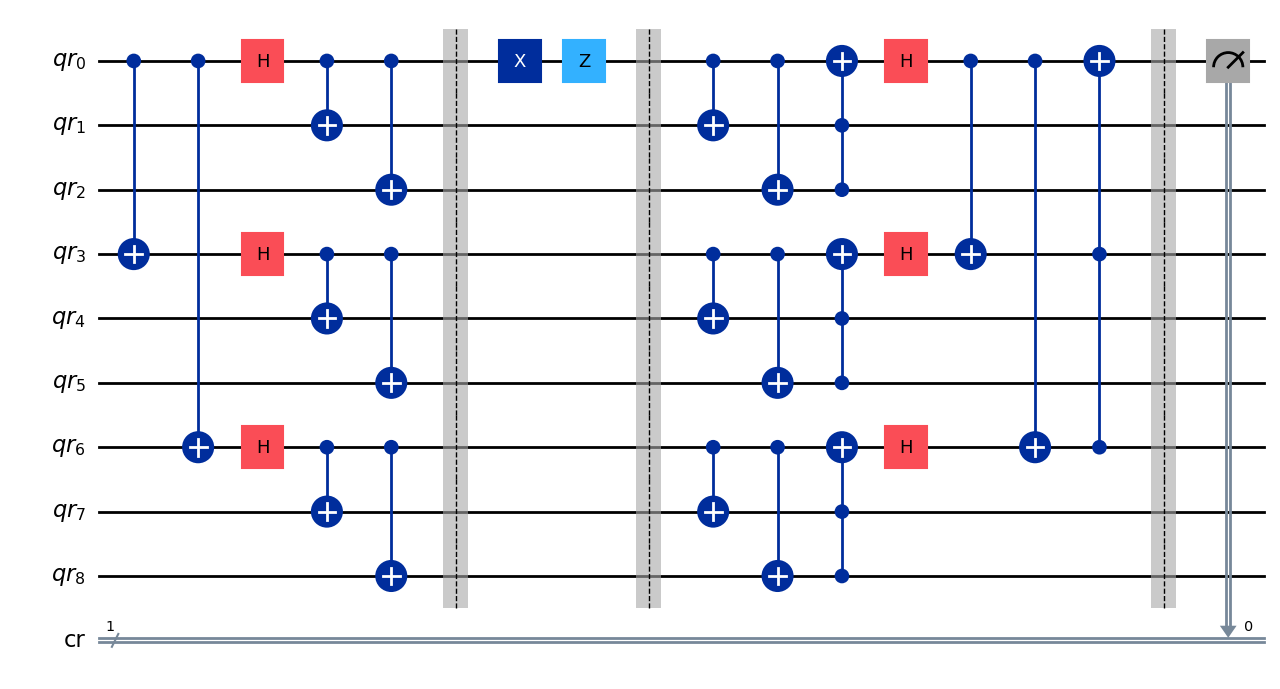

In [4]:
shor.draw("mpl")

Section - Circuit Execution and Result Analysis

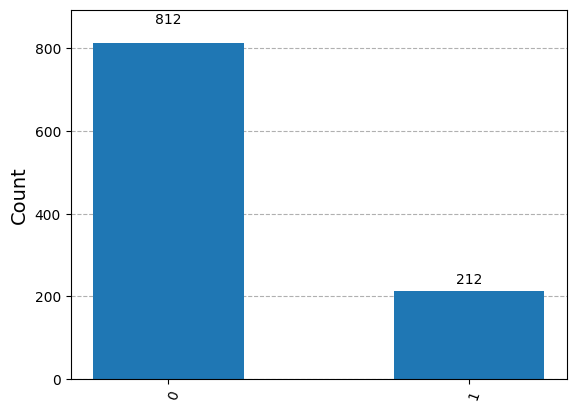

In [ ]:
# Run shor code circuit
qc_compiled = transpile(shor, backend)
job_sim = sampler.run([qc_compiled], shots=1024)
result_sim = job_sim.result()
counts = result_sim[0].data.cr.get_counts()

# Plot the result
plot_histogram(counts)